# Parte 1 - Limpando os dados

Boas vindas ao notebook da primeira semana do Challenge de Data Science!

Nesse notebook será realizada a limpeza e tratamento dos dados obtidos a partir da API da Novexus, empresa de telecomunicações.


## Importando a base de dados

O primeiro passo para começar os tratamentos é instalar e importar as bibliotecas necessárias. Vamos utilizar a biblioteca `pandas` e a biblioteca `numpy`. As documentações de ambas as bibliotecas podem ser acessadas abaixo:

 - [Documentação pandas](https://pandas.pydata.org/docs/)
 - [Documentação numpy](https://numpy.org/doc/stable/)

In [38]:
import pandas as pd
import numpy as np

Para realizar a leitura de um arquivo json, pode ser utilizada o método `pd.read_json()`, passando o caminho do arquivo como parâmetro do método.

*Esse procedimento é mostrado na aula [Carregando os dados](https://cursos.alura.com.br/course/python-pandas-tecnicas-avancadas/task/91739) do curso [Python Pandas: técnicas avançadas](https://cursos.alura.com.br/course/python-pandas-tecnicas-avancadas)*

In [39]:
dados_telecom = pd.read_json('../Dados/Telco-Customer-Churn.json')
dados_telecom.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


### Explorando o conteúdo de cada coluna

Como as colunas de **customer**, **phone**, **internet**, **account** estão com vários valores dentro de chaves e fica inviável de analisar apenas olhando para a tabela, vamos abrir o primeiro elemento de cada uma dessas colunas para entender cada uma delas.

In [40]:
for coluna in dados_telecom.columns[2:]:
    print(f"Coluna = {coluna}:")
    print(dados_telecom[coluna][0], end="\n\n")

Coluna = customer:
{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'Yes', 'Dependents': 'Yes', 'tenure': 9}

Coluna = phone:
{'PhoneService': 'Yes', 'MultipleLines': 'No'}

Coluna = internet:
{'InternetService': 'DSL', 'OnlineSecurity': 'No', 'OnlineBackup': 'Yes', 'DeviceProtection': 'No', 'TechSupport': 'Yes', 'StreamingTV': 'Yes', 'StreamingMovies': 'No'}

Coluna = account:
{'Contract': 'One year', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Mailed check', 'Charges': {'Monthly': 65.6, 'Total': '593.3'}}



Notamos que os elementos das colunas **custumer**, **phone**, **internet**, **account** são dicionários e apresentam muitas informações condensadas. Do modo que estão organizados é muito difícil realizar qualquer análise, portanto será necessário transformar cada uma das informações em uma nova coluna no DataFrame.

### Normalizando os dados de cada coluna

Para transformar os dados em novas colunas, vamos utilizar o método `pd.json_normalize()`. Esse método mapeia cada chave do dicionário em uma nova coluna e os valores contidos se tornarão as linhas.

Precisamos realizar esse procedimento para cada uma das colunas **custumer**, **phone**, **internet**, **account**, armazenando o resultado em variáveis para serem agrupadas posteriormente.

*Esse procedimento é mostrado na aula [Transformando dados no formato JSON para uma tabela](https://cursos.alura.com.br/course/pandas-limpeza-tratamento-dados/task/128346) do curso [Pandas: limpeza e tratamento de dados](https://cursos.alura.com.br/course/pandas-limpeza-tratamento-dados)*

In [41]:
import json

In [42]:
with open('../Dados/Telco-Customer-Churn.json', 'r') as f:
    dados = json.load(f)

In [43]:
df_telecom = pd.json_normalize(dados)
df_telecom.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


Vamos renomear as colunas para facilitar a análise dos dados e deixar os nomes mais descritivos:

In [44]:
df_telecom.iloc[3]

customerID                         0011-IGKFF
Churn                                     Yes
customer.gender                          Male
customer.SeniorCitizen                      1
customer.Partner                          Yes
customer.Dependents                        No
customer.tenure                            13
phone.PhoneService                        Yes
phone.MultipleLines                        No
internet.InternetService          Fiber optic
internet.OnlineSecurity                    No
internet.OnlineBackup                     Yes
internet.DeviceProtection                 Yes
internet.TechSupport                       No
internet.StreamingTV                      Yes
internet.StreamingMovies                  Yes
account.Contract               Month-to-month
account.PaperlessBilling                  Yes
account.PaymentMethod        Electronic check
account.Charges.Monthly                  98.0
account.Charges.Total                 1237.85
Name: 3, dtype: object

In [45]:
novos_nomes_colunas = {
    "customerID": "customer_id",
    "Churn": "churn",
    "customer.gender": "customer_gender",
    "customer.SeniorCitizen": "customer_senior_citizen",
    "customer.Partner": "customer_partner",
    "customer.Dependents": "customer_dependents",
    "customer.tenure": "customer_tenure",
    "phone.PhoneService": "phone_service",
    "phone.MultipleLines": "multiple_lines",
    "internet.InternetService": "internet_service",
    "internet.OnlineSecurity": "online_security",
    "internet.OnlineBackup": "online_backup",
    "internet.DeviceProtection": "device_protection",
    "internet.TechSupport": "tech_support",
    "internet.StreamingTV": "streaming_tv",
    "internet.StreamingMovies": "streaming_movies",
    "account.Contract": "contract",
    "account.PaperlessBilling": "paperless_billing",
    "account.PaymentMethod": "payment_method",
    "account.Charges.Monthly": "monthly_charges",
    "account.Charges.Total": "total_charges"
}

df_telecom = df_telecom.rename(columns=novos_nomes_colunas)


In [46]:
df_telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              7267 non-null   object 
 1   churn                    7267 non-null   object 
 2   customer_gender          7267 non-null   object 
 3   customer_senior_citizen  7267 non-null   int64  
 4   customer_partner         7267 non-null   object 
 5   customer_dependents      7267 non-null   object 
 6   customer_tenure          7267 non-null   int64  
 7   phone_service            7267 non-null   object 
 8   multiple_lines           7267 non-null   object 
 9   internet_service         7267 non-null   object 
 10  online_security          7267 non-null   object 
 11  online_backup            7267 non-null   object 
 12  device_protection        7267 non-null   object 
 13  tech_support             7267 non-null   object 
 14  streaming_tv            

O comando `.info()` mostra um resumo DataFrame, incluindo o número de linhas e colunas, os tipos de dados de cada coluna e o uso de memória.

No exemplo, a saída do comando `.info()` mostra que você temos DataFrame com 7267 linhas e 21 colunas. Os tipos de dados das colunas são uma mistura de `object`, `int64` e `float64`. O uso de memória do DataFrame é de 1,2+ MB.

O comando `.info()` também mostra o número de linhas não nulas para cada coluna. Isso informa quantas linhas no DataFrame têm um valor para essa coluna.

* **RangeIndex: 7267 entradas, 0 a 7266**
  * Isso informa que o seu DataFrame tem 7267 linhas, numeradas de 0 a 7266.
* **Data columns (total 21 columns)**
  * Isso informa que o seu DataFrame tem 21 colunas.
* **#   Column                     Non-Null Count  Dtype**
  * Isso mostra o nome de cada coluna, o número de linhas com valores não nulos para essa coluna e o tipo de dados dessa coluna.
* **dtypes: float64(1), int64(2), object(18)**
  * Isso informa os tipos de dados das colunas no seu DataFrame. O tipo de dados `float64` representa números de ponto flutuante, o tipo de dados `int64` representa números inteiros e o tipo de dados `object` representa strings ou outros objetos.
* **memory usage: 1.2+ MB**
  * Isso informa o uso de memória do seu DataFrame. O uso de memória é expresso em megabytes (MB).

In [47]:
for coluna in df_telecom.columns:
    print(f'--- {coluna} ---')
    print(df_telecom[coluna].value_counts())

--- customer_id ---
0002-ORFBO    1
6614-VBEGU    1
6637-KYRCV    1
6635-MYYYZ    1
6635-CPNUN    1
             ..
3374-TTZTK    1
3374-PZLXD    1
3374-LXDEV    1
3373-YZZYM    1
9995-HOTOH    1
Name: customer_id, Length: 7267, dtype: int64
--- churn ---
No     5174
Yes    1869
        224
Name: churn, dtype: int64
--- customer_gender ---
Male      3675
Female    3592
Name: customer_gender, dtype: int64
--- customer_senior_citizen ---
0    6085
1    1182
Name: customer_senior_citizen, dtype: int64
--- customer_partner ---
No     3749
Yes    3518
Name: customer_partner, dtype: int64
--- customer_dependents ---
No     5086
Yes    2181
Name: customer_dependents, dtype: int64
--- customer_tenure ---
1     634
72    369
2     246
3     207
4     185
     ... 
38     60
39     59
44     54
36     50
0      11
Name: customer_tenure, Length: 73, dtype: int64
--- phone_service ---
Yes    6560
No      707
Name: phone_service, dtype: int64
--- multiple_lines ---
No                  3495
Yes     

É possível perceber na variável Churn que há uma categoria que não está nomeada, representando dados faltantes. Dados faltantes não nos trazem informação útil para análise e portanto devemos removê-los do conjunto de dados.

Para remover os dados com nome vazio, fazemos uma seleção na coluna Churn em que no nome seja diferente de vazio (''). Armazenamos o resultado na variável dados.

In [48]:
# Removendo valores vazios em Churn

df_telecom = df_telecom[df_telecom['churn']!= '']
df_telecom.reset_index(drop=True, inplace=True)

Ao fim da execução do código, podemos identificar que a variável Churn não apresenta mais a classe com nome vazio.

In [49]:
df_telecom['churn'].value_counts()

No     5174
Yes    1869
Name: churn, dtype: int64

Outra coluna que apresenta dados vazios (' ') é a Charges.Total. Essa coluna tem uma relação com Charges.Monthly e tenure.

A coluna tenure representa a quantidade de meses em que o cliente estava assinando o serviço. A coluna Charges.Monthly representa os gastos mensais do cliente e Charges.Total é a quantidade total de gastos, portanto seria uma multiplicação de Charges.Monthly por tenure.

Vamos selecionar todas as linhas onde o tenure = 0, ou seja, os clientes que assinaram o serviço por 0 meses, e mostrar os resultados para as colunas Charges.Total e Charges.Monthly.

Verificamos que quando tenure = 0, os dados de Charges.Total é vazio (' ').

Vamos agora selecionar os dados onde Charges.Total = ' ', mostrando os resultados para Charges.Monthly e tenure.

In [50]:
df_telecom[df_telecom['customer_tenure'] ==  0][['monthly_charges', 'customer_tenure', 'total_charges']]

,monthly_charges,customer_tenure,total_charges
945,56.05,0,
1731,20.00,0,
1906,61.90,0,
2025,19.70,0,
2176,20.25,0,
2250,25.35,0,
2855,73.35,0,
3052,25.75,0,
3118,52.55,0,
4054,80.85,0,


Percebe-se que todas as linhas de Charges.Total que estão vazias é porque o cliente não assinou nem por um mês. Temos que preencher esse valor com o mesmo valor que está presente em "Charges.Monthly" pois esse representa o total.

Vamos utilizar o método `where` para preencher os valores vazios de Charges.Total com os valores de Charges.Monthly. A documentação do método `where` pode ser acessada [aqui](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.where.html).

In [51]:
df_telecom["total_charges"] = df_telecom["total_charges"]\
    .where(
        df_telecom["total_charges"] != ' ', 
        df_telecom["monthly_charges"]
    )

In [52]:
df_telecom[df_telecom['customer_tenure'] ==  0][['monthly_charges', 'customer_tenure', 'total_charges']]

,monthly_charges,customer_tenure,total_charges
945,56.05,0,56.05
1731,20.00,0,20.0
1906,61.90,0,61.9
2025,19.70,0,19.7
2176,20.25,0,20.25
2250,25.35,0,25.35
2855,73.35,0,73.35
3052,25.75,0,25.75
3118,52.55,0,52.55
4054,80.85,0,80.85


In [53]:
df_telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              7043 non-null   object 
 1   churn                    7043 non-null   object 
 2   customer_gender          7043 non-null   object 
 3   customer_senior_citizen  7043 non-null   int64  
 4   customer_partner         7043 non-null   object 
 5   customer_dependents      7043 non-null   object 
 6   customer_tenure          7043 non-null   int64  
 7   phone_service            7043 non-null   object 
 8   multiple_lines           7043 non-null   object 
 9   internet_service         7043 non-null   object 
 10  online_security          7043 non-null   object 
 11  online_backup            7043 non-null   object 
 12  device_protection        7043 non-null   object 
 13  tech_support             7043 non-null   object 
 14  streaming_tv            

Por fim, vamos modificar o tipo da variável `total_charges` para float, uma vez que o tipo estava como object.

In [54]:
df_telecom['total_charges'] = df_telecom['total_charges'].astype('float64')

In [55]:
df_telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              7043 non-null   object 
 1   churn                    7043 non-null   object 
 2   customer_gender          7043 non-null   object 
 3   customer_senior_citizen  7043 non-null   int64  
 4   customer_partner         7043 non-null   object 
 5   customer_dependents      7043 non-null   object 
 6   customer_tenure          7043 non-null   int64  
 7   phone_service            7043 non-null   object 
 8   multiple_lines           7043 non-null   object 
 9   internet_service         7043 non-null   object 
 10  online_security          7043 non-null   object 
 11  online_backup            7043 non-null   object 
 12  device_protection        7043 non-null   object 
 13  tech_support             7043 non-null   object 
 14  streaming_tv            

In [56]:
df_telecom.to_json("../Dados/Telco-Customer-Churn-limpeza.json")

# Parte 2 - Análise exploratória dos dados

Depois da limpeza inicial dos dados, é ideal fazer uma análise gráfica para entender quais as variáveis que são relacionadas com o churn para que a equipe de vendas tenha uma noção do cenário atual, e também para que nós possamos entender de forma mais objetiva e formar possíveis hipóteses do que está acontecendo com os clientes.

O primeiro passo é importar as bibliotecas que vamos utilizar durante o processo e nesse passo também vamos importar algumas função do **utils**, um arquivo em Python, onde criamos funções auxiliares para que nosso processo neste notebook não ficasse tão poluído. 

In [57]:
import sys
sys.path.append('../')

import seaborn as sns
import matplotlib.pyplot as plt

from plotly.express import box
from utils.utils import plot_countplot, heatmap_corr

In [58]:
df_telecom.head()

,customer_id,churn,customer_gender,customer_senior_citizen,customer_partner,customer_dependents,customer_tenure,phone_service,multiple_lines,internet_service,...,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


Para começar a analisar, vamos utilizar o método `.describe()` para entender alguns métodos estatísticos que temos dentro da base de dados.

O método `describe()` fornece as informações sobre:

* `count` - Conta a quantidade de número de valores não vazios. Com esses valores podemos entender melhor o tamanho da amostra.

* `mean` - O valor médio, em média aritmética. Como ele faz uma média aritmética nem sempre mostra a realidade da maior parte dos casos do banco de dados.

* `std` - O desvio padrão. É a medida de como os dados se dispersam em relação à média, ou seja, o quanto eles estão espalhados.

* `min` e `max` - Valores que auxiliam a identificar a amplitude da amostra, entre o valor mínimo e máximo.

* `quartis` - Valores que nos mostram de que forma os dados foram distribuídos, por exemplo em 50% é a mediana e metade dos valores são inferiores a X valor, a outra metade é superior àquele valor.

Para saber mais sobre esse método, acesse o artigo [Ampliando a análise com o Describe](https://www.alura.com.br/artigos/ampliando-a-analise-com-describe).

In [59]:
df_telecom.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_senior_citizen,7043.0,0.162147,0.368612,0.00,0.00,0.00,0.00,1.00
customer_tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
monthly_charges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
total_charges,7043.0,2279.798992,2266.730170,18.80,398.55,1394.55,3786.60,8684.80


Podemos observar que apenas 4 colunas podem ser analisadas com o método `.describe()`, então vamos utilizar o `.dtypes` para entender quais são os tipos de dados que temos dentro da nosso dataset.

In [60]:
df_telecom.dtypes

customer_id                 object
churn                       object
customer_gender             object
customer_senior_citizen      int64
customer_partner            object
customer_dependents         object
customer_tenure              int64
phone_service               object
multiple_lines              object
internet_service            object
online_security             object
online_backup               object
device_protection           object
tech_support                object
streaming_tv                object
streaming_movies            object
contract                    object
paperless_billing           object
payment_method              object
monthly_charges            float64
total_charges              float64
dtype: object

Como podemos observar, a maior parte dos dados que temos é **object**, e o método não consegue trabalhar com variáveis categóricas **a não ser que** seja passado um parâmetro permitindo essa inclusão, porém algumas das nossas análises do método `.describe()` podem ser perdidas.

In [61]:
# Para analisar as features que são categóricas, podemos usar include

df_telecom.describe(include=[object]).T

,count,unique,top,freq
customer_id,7043,7043,0002-ORFBO,1
churn,7043,2,No,5174
customer_gender,7043,2,Male,3555
customer_partner,7043,2,No,3641
customer_dependents,7043,2,No,4933
phone_service,7043,2,Yes,6361
multiple_lines,7043,3,No,3390
internet_service,7043,3,Fiber optic,3096
online_security,7043,3,No,3498
online_backup,7043,3,No,3088


O nosso método `.describe()` retornou 3 linhas diferentes das que já conheciamos:

* `unique` é a quantidade de valores únicos
* `top` é o valor mais comum 
* `freq` é a quantidade vezes que o valor mais comum aparece

Mas mesmo com esses valores, ainda fica complicado de obtermos respostas e de passarmos algo concreto para o time do comercial avaliar, principalmente para formular alguma hipótese sobre o churn, por isso agora vamos passar para a parte gráfica.

### Análises gráfica

Nesta parte é interessante focar em quais visualizações serão melhores para apresentar para nossos companheiros de equipe, e para isso podemos ver o vídeo [Data Visualization: tipos de visualização](https://cursos.alura.com.br/extra/alura-mais/data-visualization-tipos-de-visualizacao-c1409). Os gráficos podem ser feitos usando o Matplotlib, Seaborn ou alguma outra biblioteca gráfica da sua escolha.

A primeira análise a ser feita é da distribuição da variável target, Churn, para entender quantos casos nós temos de pessoas que cancelaram contrato e quantas ainda estão com o contrato ativo. 
Para isso, vamos utilizar a função `plot_countplot` do arquivo **utils**, que utiliza o `countplot` da biblioteca Seaborn e você pode conferir mais sobre ele no curso [Data Visualization: criando gráficos com bibliotecas Python](https://cursos.alura.com.br/course/data-visualization-graficos-bibliotecas-python) e para saber específicamente sobre a função, pode conferir pela [documentação](https://seaborn.pydata.org/generated/seaborn.countplot.html).

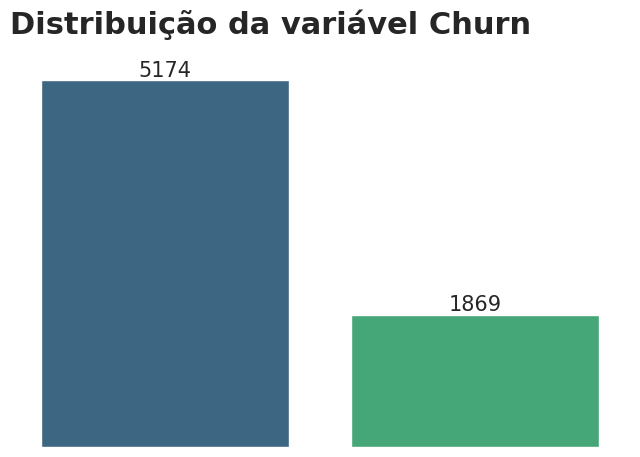

In [62]:
plot_countplot(dados=df_telecom, 
               x='churn', 
               titulo="Distribuição da variável Churn",
               show_x_label=False 
    )

Repetindo a mesma análise para a variável gênero:

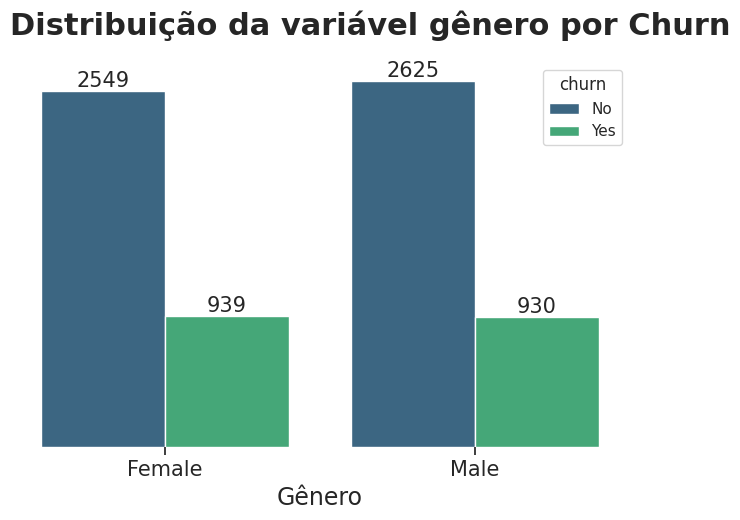

In [63]:
# Plotando o gráfico de Gênero

plot_countplot(dados=df_telecom, 
               x='customer_gender', 
               titulo="Distribuição da variável gênero por Churn",
               label_x='Gênero', 
               hue='churn'
    )

Podemos identificar que a variável "gender" **não possui impacto no churn**, uma vez que a proporção de pessoas que cancelaram o serviço entre os genêros é a mesma. 

Vamos plotar os gráficos para os serviços de internet:

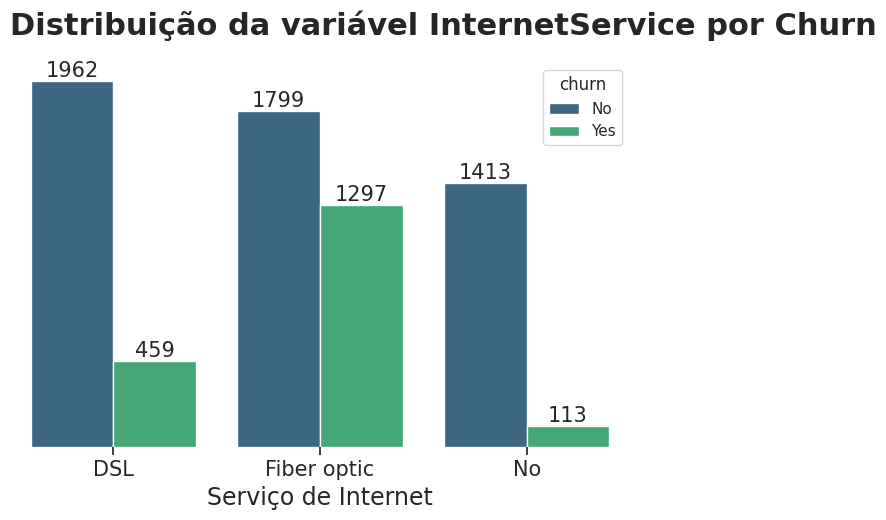

In [64]:
# Plotando o gráfico do serviço de internet

plot_countplot(dados=df_telecom, 
               x='internet_service', 
               titulo="Distribuição da variável InternetService por Churn",
               label_x='Serviço de Internet', 
               hue='churn'
    )

Percebe-se analisando o gráfico acima que os clientes que utilizam fibra ótica como serviço de internet possuem uma taxa de churn proporcionalmente maior que os demais. A empresa poderia oferecer mais o tipo de serviço DSL já que possui uma evasão menor, ou identificar quais problemas que está acontecendo com o serviço de fibra ótica e melhorá-lo 

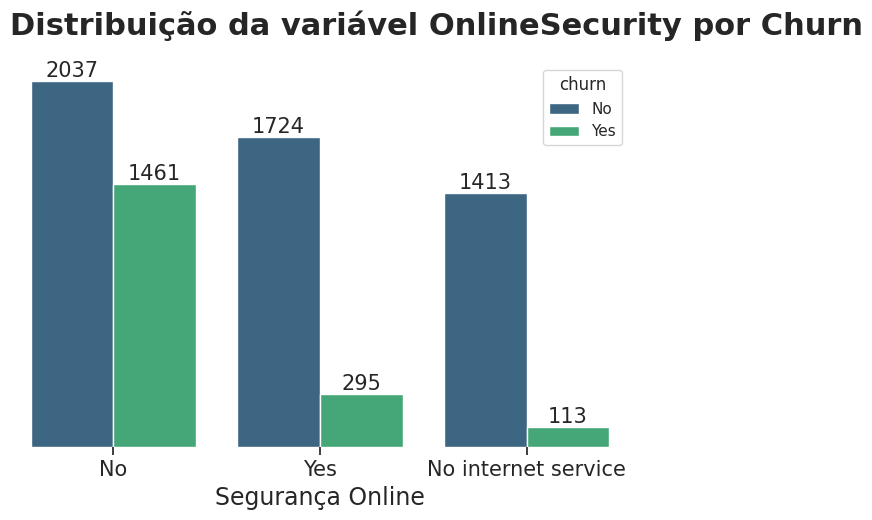

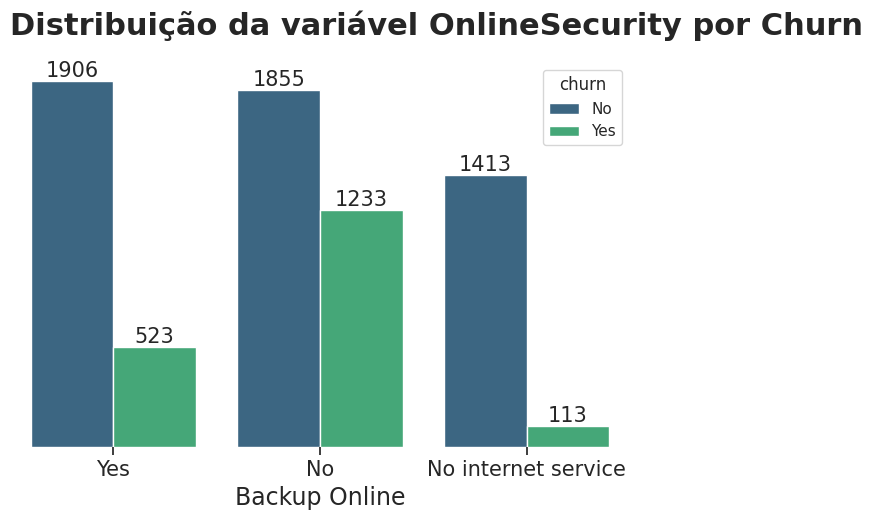

In [65]:
# Plotando o gráfico referente a se o cliente possui segurança online ou não

plot_countplot(dados=df_telecom, 
               x='online_security', 
               titulo="Distribuição da variável OnlineSecurity por Churn",
               label_x='Segurança Online', 
               hue='churn'
    ) 

# Plotando o gráfico referente a se o cliente possui ou não um backup online

plot_countplot(dados=df_telecom, 
               x='online_backup', 
               titulo="Distribuição da variável OnlineSecurity por Churn",
               label_x='Backup Online',
               hue='churn'
    )

Do gráfico acima temos que os clientes que não assinam o serviço de segurança online e também não possuem backup online tendem a deixar de utilizar os serviços. Oferecer um serviço de segurança online e backup online seria uma uma boa opção para reduzir a taxa de cancelamentos.

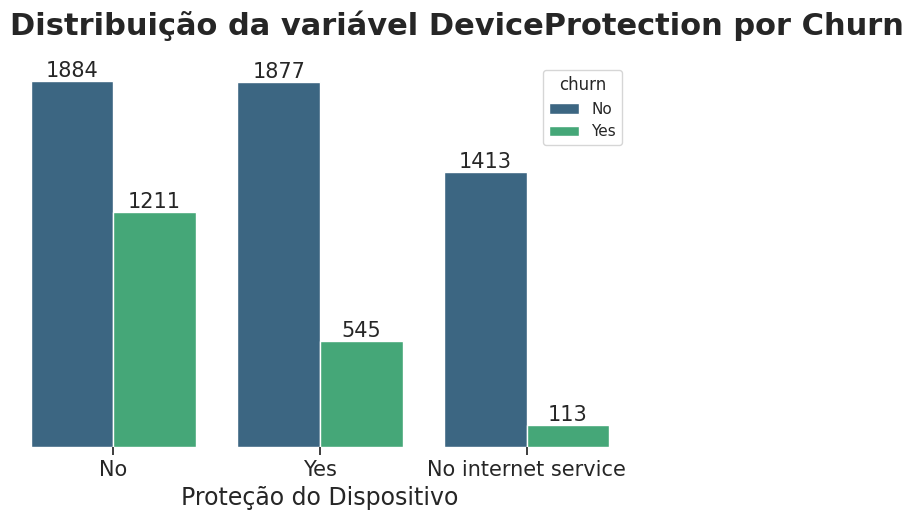

In [66]:
# Plotando o gráfico referente a se o cliente possui proteção do dispositivo ou não

plot_countplot(dados=df_telecom, 
               x='device_protection', 
               titulo="Distribuição da variável DeviceProtection por Churn",
               label_x='Proteção do Dispositivo', 
               hue='churn'
    ) 

Do gráfico acima temos que os clientes que não possuem a proteção do dispositivo tendem a deixar de utilizar os serviços da empresa. Oferecer um serviço de proteção é uma boa opção para reduzir a taxa de cancelamento.

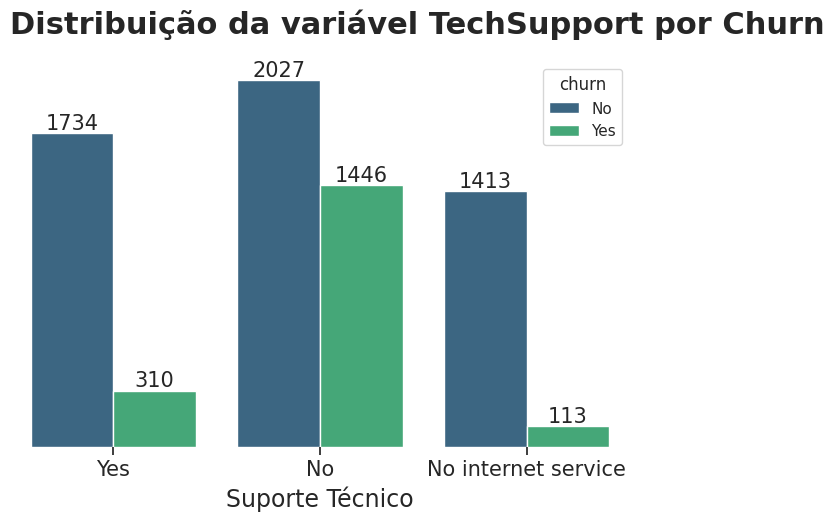

In [67]:
# Plotando o gráfico referente a se o cliente tem suporte técnico ou não.

plot_countplot(dados=df_telecom, 
               x='tech_support', 
               titulo="Distribuição da variável TechSupport por Churn",
               label_x='Suporte Técnico',
               hue='churn'
    ) 

Clientes que não possuem suporte técnico tendem a deixar de utilizar os serviços da empresa. Oferecer um serviço de suporte técnico é uma boa opção para reduzir a taxa de cancelamentos.

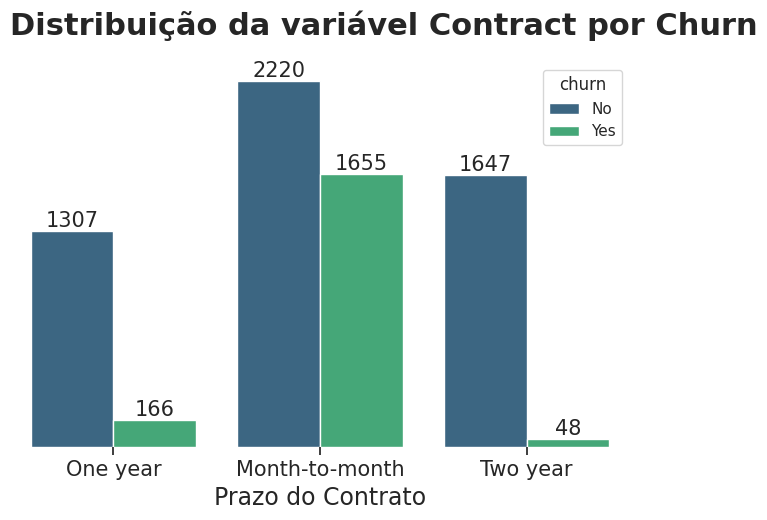

In [68]:
# Plotando o gráfico referente ao prazo do contrato do cliente

plot_countplot(dados=df_telecom, 
               x='contract', 
               titulo="Distribuição da variável Contract por Churn",
               label_x='Prazo do Contrato', 
               hue='churn',
               small=True
    ) 

Pelo gráfico acima temos que os clientes que possuem um contrato mensal são os que tendem a deixar de utilizar os serviços da empresa. Oferecer um serviço de contrato anual ou de dois anos é uma boa opção para reduzir a taxa de cancelamentos. 

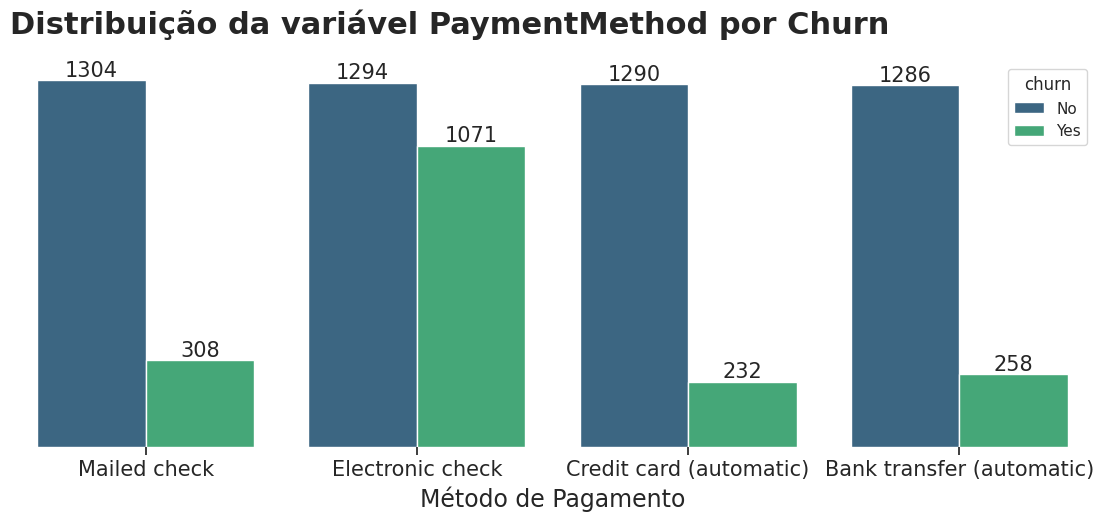

In [69]:
# Plotando o gráfico referente ao método de pagamento do cliente

plot_countplot(dados=df_telecom, 
               x='payment_method', 
               titulo="Distribuição da variável PaymentMethod por Churn",
               label_x='Método de Pagamento', 
               hue='churn', 
               figsize=(14, 5)
    ) 

Percebemos que as pessoas utilizam o método de pagamento "Eletronic check" tendem a cancelar os serviços da empresa. Direcionar os clientes para outro método de pagamento é uma boa opção para reduzir a taxa de cancelamentos, como por exemplo cartão de crédito que é onde tem a menor taxa de cancelamento.

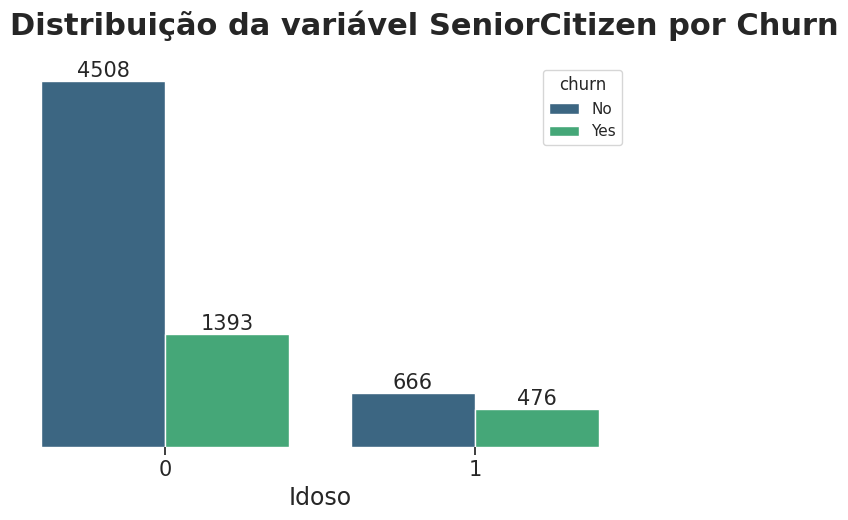

In [70]:
# Plotando o gráfico a se o cliente é idoso ou não por churn.

plot_countplot(dados=df_telecom, 
               x='customer_senior_citizen', 
               titulo="Distribuição da variável SeniorCitizen por Churn",
               label_x='Idoso', 
               hue='churn'
    ) 

Apesar da quantidade de clientes idosos ser bem menor, a proporção de clientes que cancelaram o serviço entre os idosos é maior que a de clientes que não são idosos. Entender os motivos que estão levando a essa taxa de cancelamento entre os idosos e adotar medidas para melhorar o serviço para esses clientes é uma boa opção para reduzir a taxa de cancelamento.

Para analisar as variáveis que são numéricas vamos utilizar o Boxplot, que é um gráfico que mostra a distribuição de dados por meio de quartis. Para conhecer mais sobre esse tipo de gráfico você pode o artigo: [Melhorando a análise com o Boxplot](https://www.alura.com.br/artigos/melhorando-a-analise-com-o-boxplot).



#### Utilizando a biblioteca plotly

In [71]:
# Imprimindo boxplot com o plotly

for col in ['customer_tenure', 'monthly_charges']:
    fig = box(df_telecom, x=col, color='churn', orientation='h', title=col)
    fig.show()

In [72]:
# Imprimindo boxplot com o plotly

for col in ['customer_tenure', 'monthly_charges']:
    fig = box(df_telecom, x=col, color='churn', orientation='h')
    fig.show()

#### Utilizando a biblioteca seaborn

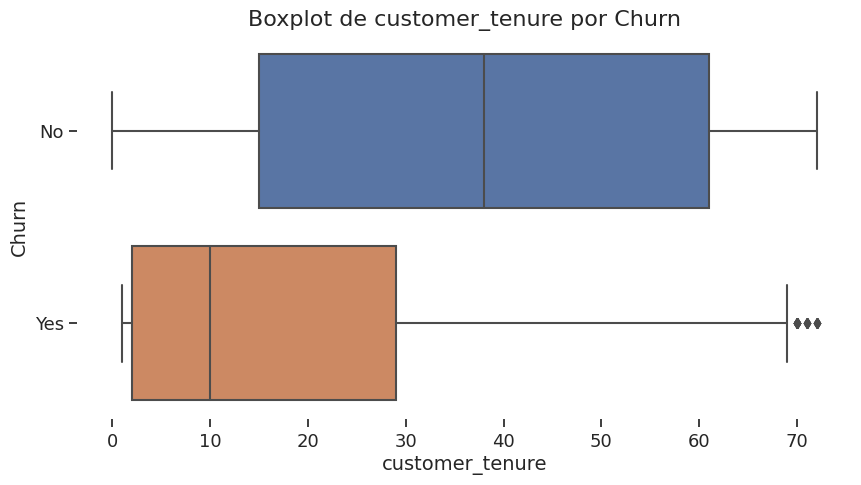

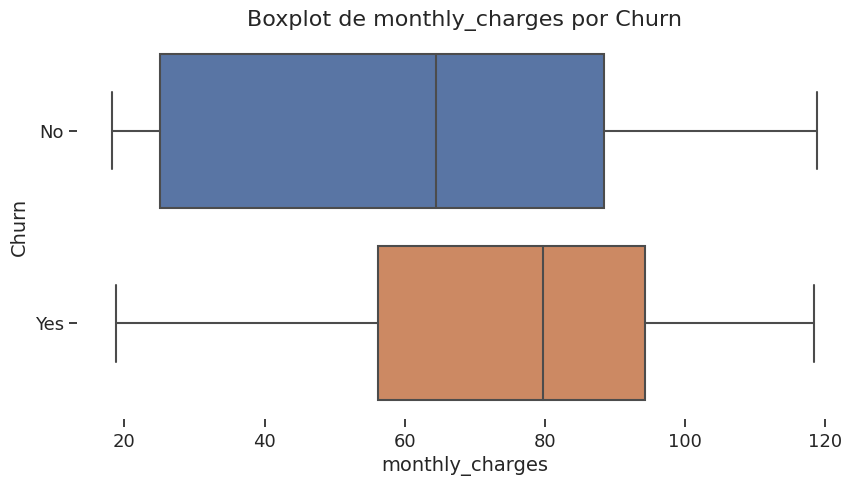

In [73]:
for col in ['customer_tenure', 'monthly_charges']:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=col, y='churn', data=df_telecom)
    plt.title(f"Boxplot de {col} por Churn", fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Churn', fontsize=14)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.show()

Analisando a feature "tenure", que representa o tempo de contrato do cliente, percebe-se que clientes que estão a mais tempo tendem a continuar a utilizar o serviço. 

Para a feature "Charges.Monthly", percebe-se que os clientes que adquirem serviços mais baratos tendem a continuar utilizando o serviço.

### Análise de correlação:

Vamos analisar as features "tenure" e "Charges.Monthly" e "Charges.Total" que aparentemente estão correlacionadas.

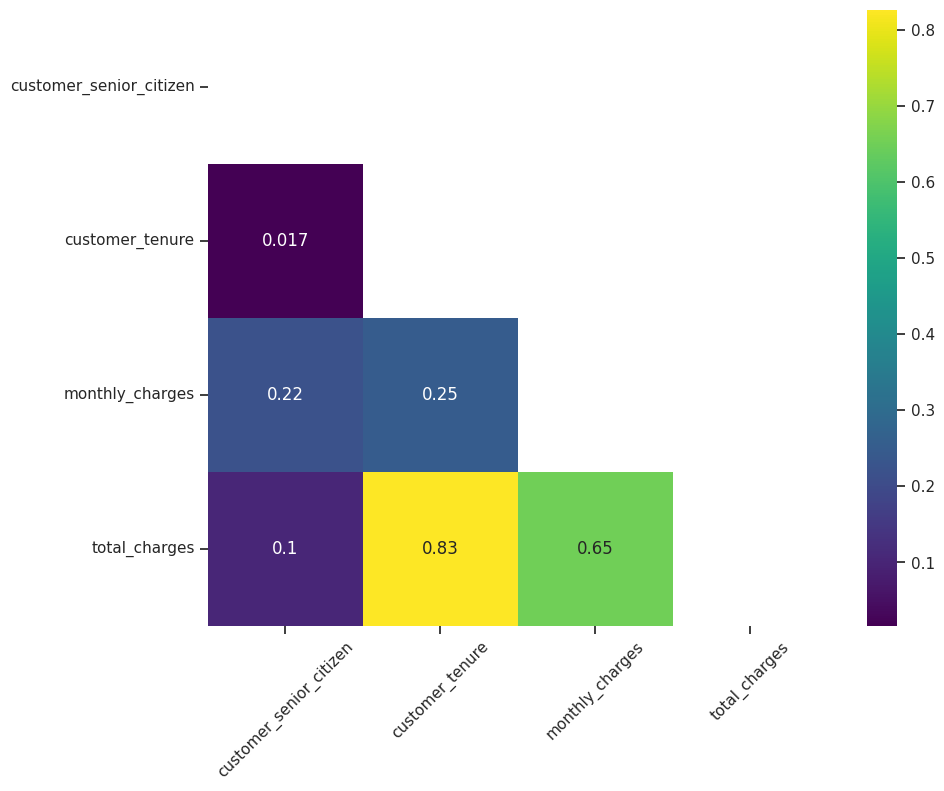

In [74]:
heatmap_corr(df_telecom, figsize=(10, 8))

As features "tenure" e "Charges.Total" possuem uma correlação forte, o que significa que a medida que uma aumenta a outra aumenta também. Não é muito interessante trabalharmos com duas features correlacionadas pois isso quer dizer que ambas as colunas transmitem a mesma informação, portanto vamos remover a feature "Charges.Total" posteriormente.